# EDA Project: Overview

Hello and welcome to my notebook for doing first project in mlc.course. Accordig to project description, we have to collect data about countries and come up with hypothesis from what we have. And of course, the proof of whether the hypothesis is true or false.

So, my solution is consisted of two parts:
1. Collecting basic information about countries (like population, density and so on).
2. Checking validity of some hypothesis from the data.

This notebooks is writtendow as a kaggle notebooks and stored to GitHub repositories. Without a further a do, let's dive in.

# Collecting basic data about countries

In the first part, I chose to use three kaggle dataset as a starter:
- World Population dataset (https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset)
- World Happiness dataset (https://www.kaggle.com/datasets/unsdsn/world-happiness)
- Countries of the world dataset (https://www.kaggle.com/datasets/fernandol/countries-of-the-world)

The processes mainly included to reading datasets, removing unnecessary and repeated features and merging datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## World Population dataset

In [2]:
world=pd.read_csv('/kaggle/input/world-population-dataset/world_population.csv')
world.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [3]:
world.drop(['Rank', "CCA3"], axis=1, inplace=True)
world.rename(columns={'Country/Territory': 'Country', 'Density (per km²)':'Destiny',
                      'Area (km²)':"Area"}, inplace=True)
world

,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area,Destiny,Growth Rate,World Population Percentage
0,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
world.isna().sum()

Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area                           0
Destiny                        0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## World happiness dataset

In [5]:
happiness=pd.read_csv('/kaggle/input/world-happiness/2019.csv')
happiness.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [6]:
happiness.rename(columns={'Country or region': 'Country', 'Score':'happiness'},
                 inplace=True)
happiness.drop(['Overall rank'], axis=1, inplace=True)
happiness

,Country,happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [7]:
happiness.sort_values(by=['Country'], inplace=True)
happiness = happiness.reset_index()
happiness.drop('index', axis=1, inplace=True)

In [8]:
happiness.isna().sum()

Country                         0
happiness                       0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Countries of the world dataset

In [9]:
countries=pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv')
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [10]:
#countries.rename(columns={'Country': 'country'}, inplace=True)
countries.drop(['Region', 'Population', 'Area (sq. mi.)','Pop. Density (per sq. mi.)', 'GDP ($ per capita)'],
             axis=1, inplace=True)
countries

,Country,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,"0,00","23,06","163,07","36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,"1,26","-4,93","21,52","86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,"0,04","-0,39",31,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,"58,29","-20,71","9,27","97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,"0,00","6,6","4,05","100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,"0,00","2,98","19,62",NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,"0,42",NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,"0,36",0,"61,5","50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,"0,00",0,"88,29","80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [11]:
countries.isna().sum()

Country                                0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

When I am merging other datasets with this dataset, I am having mindblowing errors. With little bit of digging, I found that for each of country name, they included white-space at the end. So, I use python's right strip.

In [12]:
new_list=[]
for country in countries.Country.tolist():
    new_list.append(country.rstrip())
countries.Country=new_list

## Merging

In [13]:
world.shape, happiness.shape, countries.shape

((234, 15), (156, 8), (227, 15))

In [14]:
df = pd.merge(world, happiness, on='Country', how='left')
df = pd.merge(df, countries, on='Country', how='left')

In later hyppothesis, we will add more datasets. But, we are done with basic one.

In [15]:
df.set_index('Country', inplace=True)

In [16]:
df.columns

Index(['Capital', 'Continent', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area',
       'Destiny', 'Growth Rate', 'World Population Percentage', 'happiness',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

# Hypothesis

## 1. More money -> more happiness

I might seem guilty, if I do not start with one of the most important asset in our life: happiness(or isn't). There is a saying that "money can't buy happiness". Let's see there is any correlation between each countries GDP per capita and happiness score(that we got from World Happiness dataset).

In [17]:
df1=df[['GDP per capita', 'happiness']]
df1=df1.dropna()

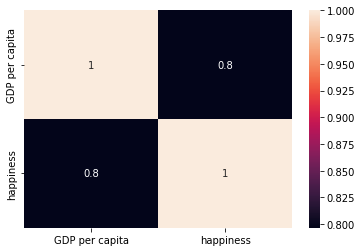

In [18]:
import seaborn as sns
ax = sns.heatmap(df1.corr(), annot=True)

Wow, nearly 0.8. Pretty srtaightforward, That is worth to rethink about old saying, isn't it.

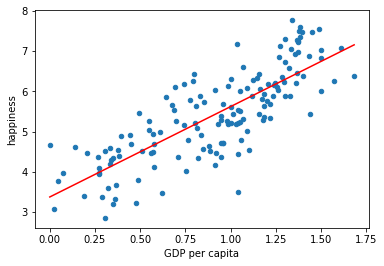

In [19]:
x=df1['GDP per capita']
y=df1['happiness']

df1.plot(x='GDP per capita', y='happiness', kind='scatter')
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.show()

## 2. Less Corrupt society -> more life expectancy

This one doesn't need any description.

In [20]:
df2=df[['Healthy life expectancy','Perceptions of corruption']]
df2=df2.dropna()

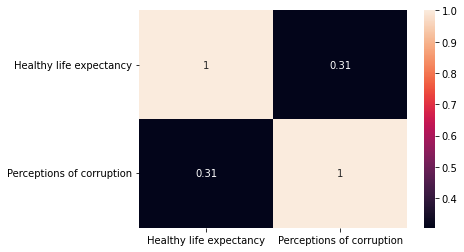

In [21]:
ax = sns.heatmap(df2.corr(), annot=True)

But, it seems those who do corruption are more likely to invest their health.

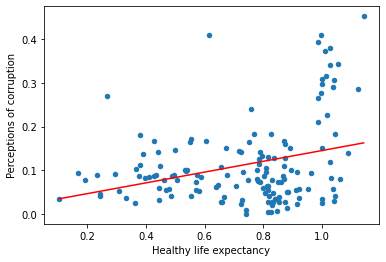

In [22]:
x=df2['Healthy life expectancy']
y=df2['Perceptions of corruption']

df2.plot(x='Healthy life expectancy', y='Perceptions of corruption', kind='scatter')
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.show()

## 3. More diffrence in male and female heights -> less smartness

In [23]:
heights=pd.read_csv('/kaggle/input/height-of-male-and-female-by-country-2022/Height of Male and Female by Country 2022.csv')
heights.columns

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [24]:
heights.rename(columns={'Country Name': 'Country'}, inplace=True)
heights.drop(['Rank', 'Male Height in Ft', 'Female Height in Ft'],
             axis=1, inplace=True)
heights

,Country,Male Height in Cm,Female Height in Cm
0,Netherlands,183.78,170.36
1,Montenegro,183.30,169.96
2,Estonia,182.79,168.66
3,Bosnia and Herzegovina,182.47,167.47
4,Iceland,182.10,168.91
...,...,...,...
194,Mozambique,164.30,155.42
195,Papua New Guinea,163.10,156.89
196,Solomon Islands,163.07,156.79
197,Laos,162.78,153.10


In [25]:
heights.sort_values(by=['Country'], inplace=True)
heights = heights.reset_index()
heights.drop('index', axis=1, inplace=True)

In [26]:
iq=pd.read_csv('/kaggle/input/average-iq-by-country/csvData.csv')
iq.columns

Index(['rank', 'country', 'iq', 'pop2022'], dtype='object')

In [27]:
iq.rename(columns={'country': 'Country'}, inplace=True)
iq.drop(['rank', 'pop2022'], axis=1, inplace=True)

In [28]:
df3=pd.merge(heights, iq, on='Country', how='left')
df3['difference_in_heights']=abs(df3['Male Height in Cm']-df3['Female Height in Cm'])

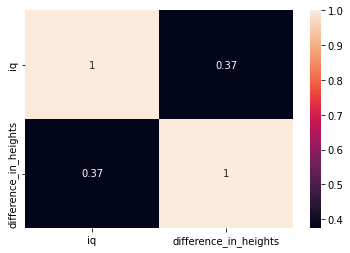

In [29]:
df3=df3[['iq', 'difference_in_heights']].dropna()
ax = sns.heatmap(df3.corr(), annot=True)

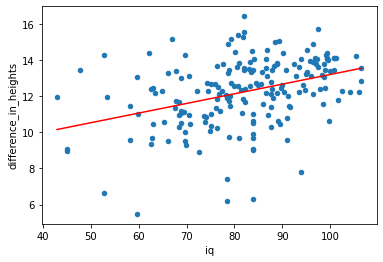

In [30]:
x=df3['iq']
y=df3['difference_in_heights']

df3.plot(x='iq', y='difference_in_heights', kind='scatter')
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.show()

## 4. More smart -> less alcohol

In [31]:
alcohol=pd.read_csv('/kaggle/input/alcohol-consumption-by-country/alcohol-consumption-vs-gdp-per-capita.csv')
alcohol.columns

Index(['Entity', 'Code', 'Year',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

In [32]:
alcohol=alcohol.loc[alcohol.Year==2015]

In [33]:
alcohol.rename(columns={'Entity': 'Country', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'total_alcohol_consumtion'},
          inplace=True)
alcohol.drop(['Code', 'Year', 'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Continent'], axis=1, inplace=True)

In [34]:
df4=pd.merge(alcohol, iq, on='Country', how='right')
df4.set_index('Country', inplace=True)

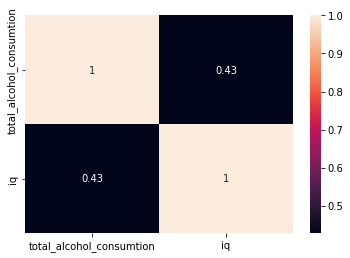

In [35]:
df4=df4.dropna()
ax = sns.heatmap(df4.corr(), annot=True)

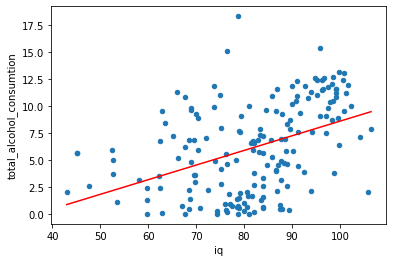

In [36]:
x=df4['iq']
y=df4['total_alcohol_consumtion']

df4.plot(x='iq', y='total_alcohol_consumtion', kind='scatter')
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.show()